### Re-run some analyses for just Hippocampus/MTL units
All the previous decoding analyses, just using subset of HC units, also compare with PFC units

In [3]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData

import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
FEATURE_DIMS = ["Color", "Shape", "Pattern"]
PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
SMOOTH = 1
EVENT = "FeedbackOnset"
OUTPUT_DIR = "/data/patrick_res/pseudo"
# path to a dataframe of sessions to analyze
SESSIONS_PATH = "/data/patrick_res/sessions/valid_sessions_rpe.pickle"

### Decoding of selected features

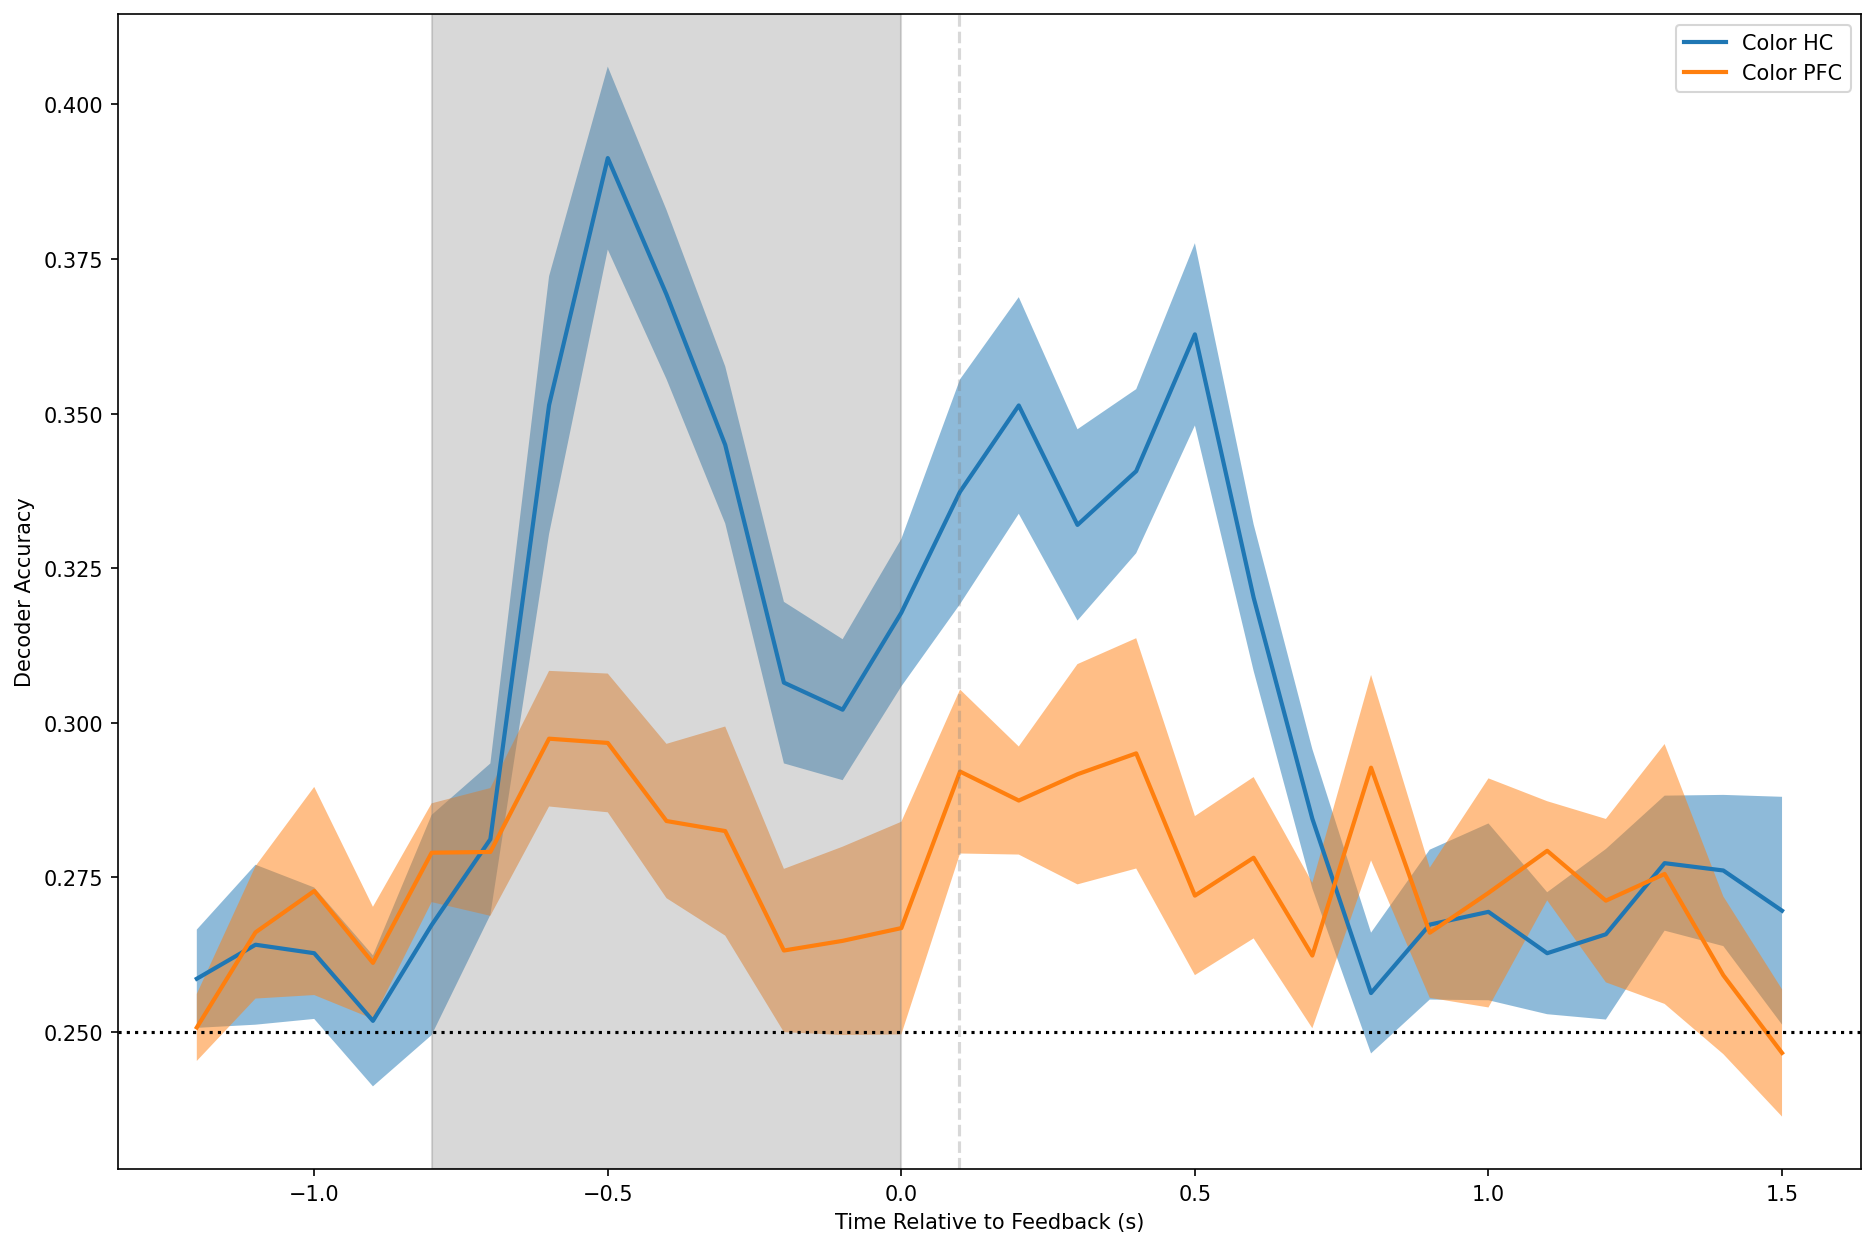

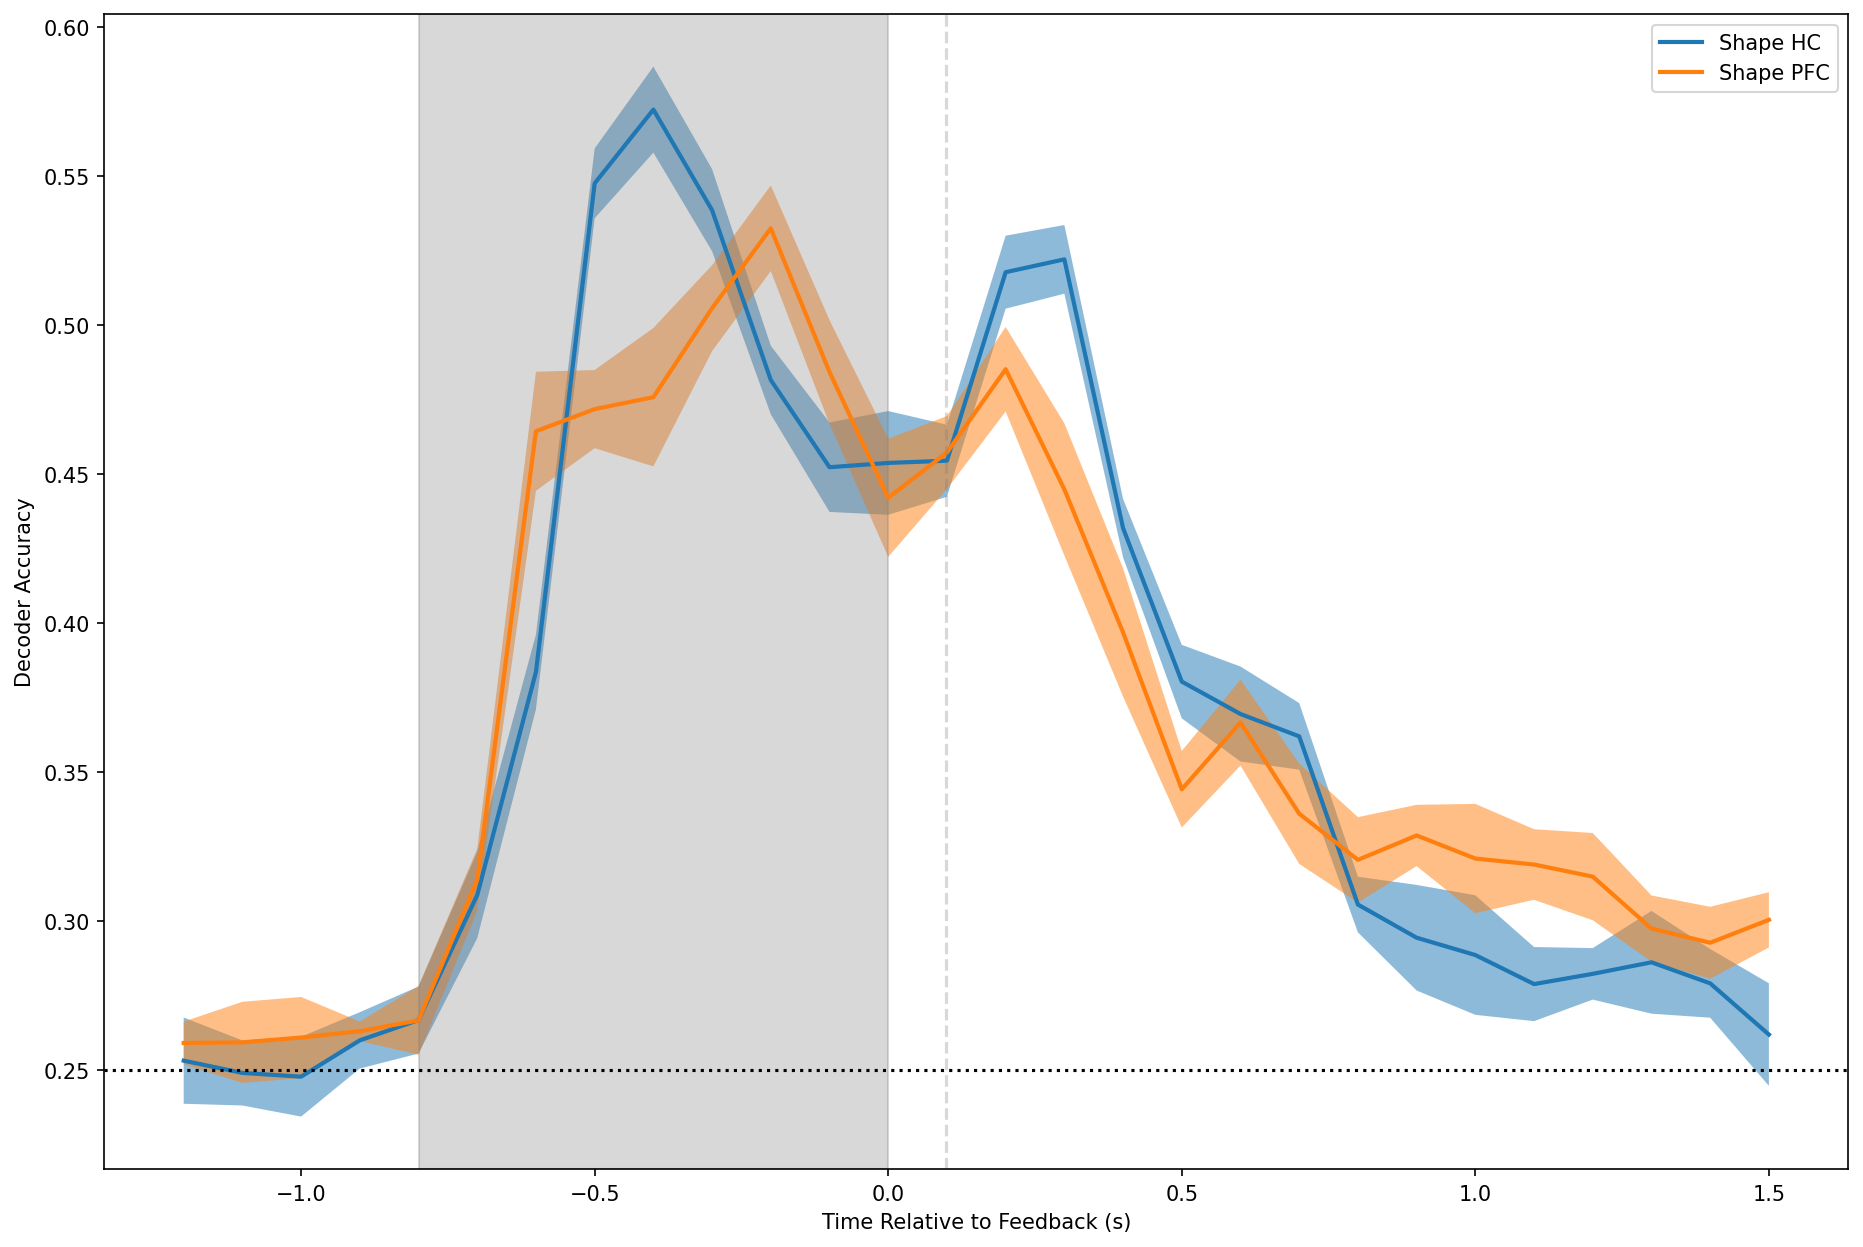

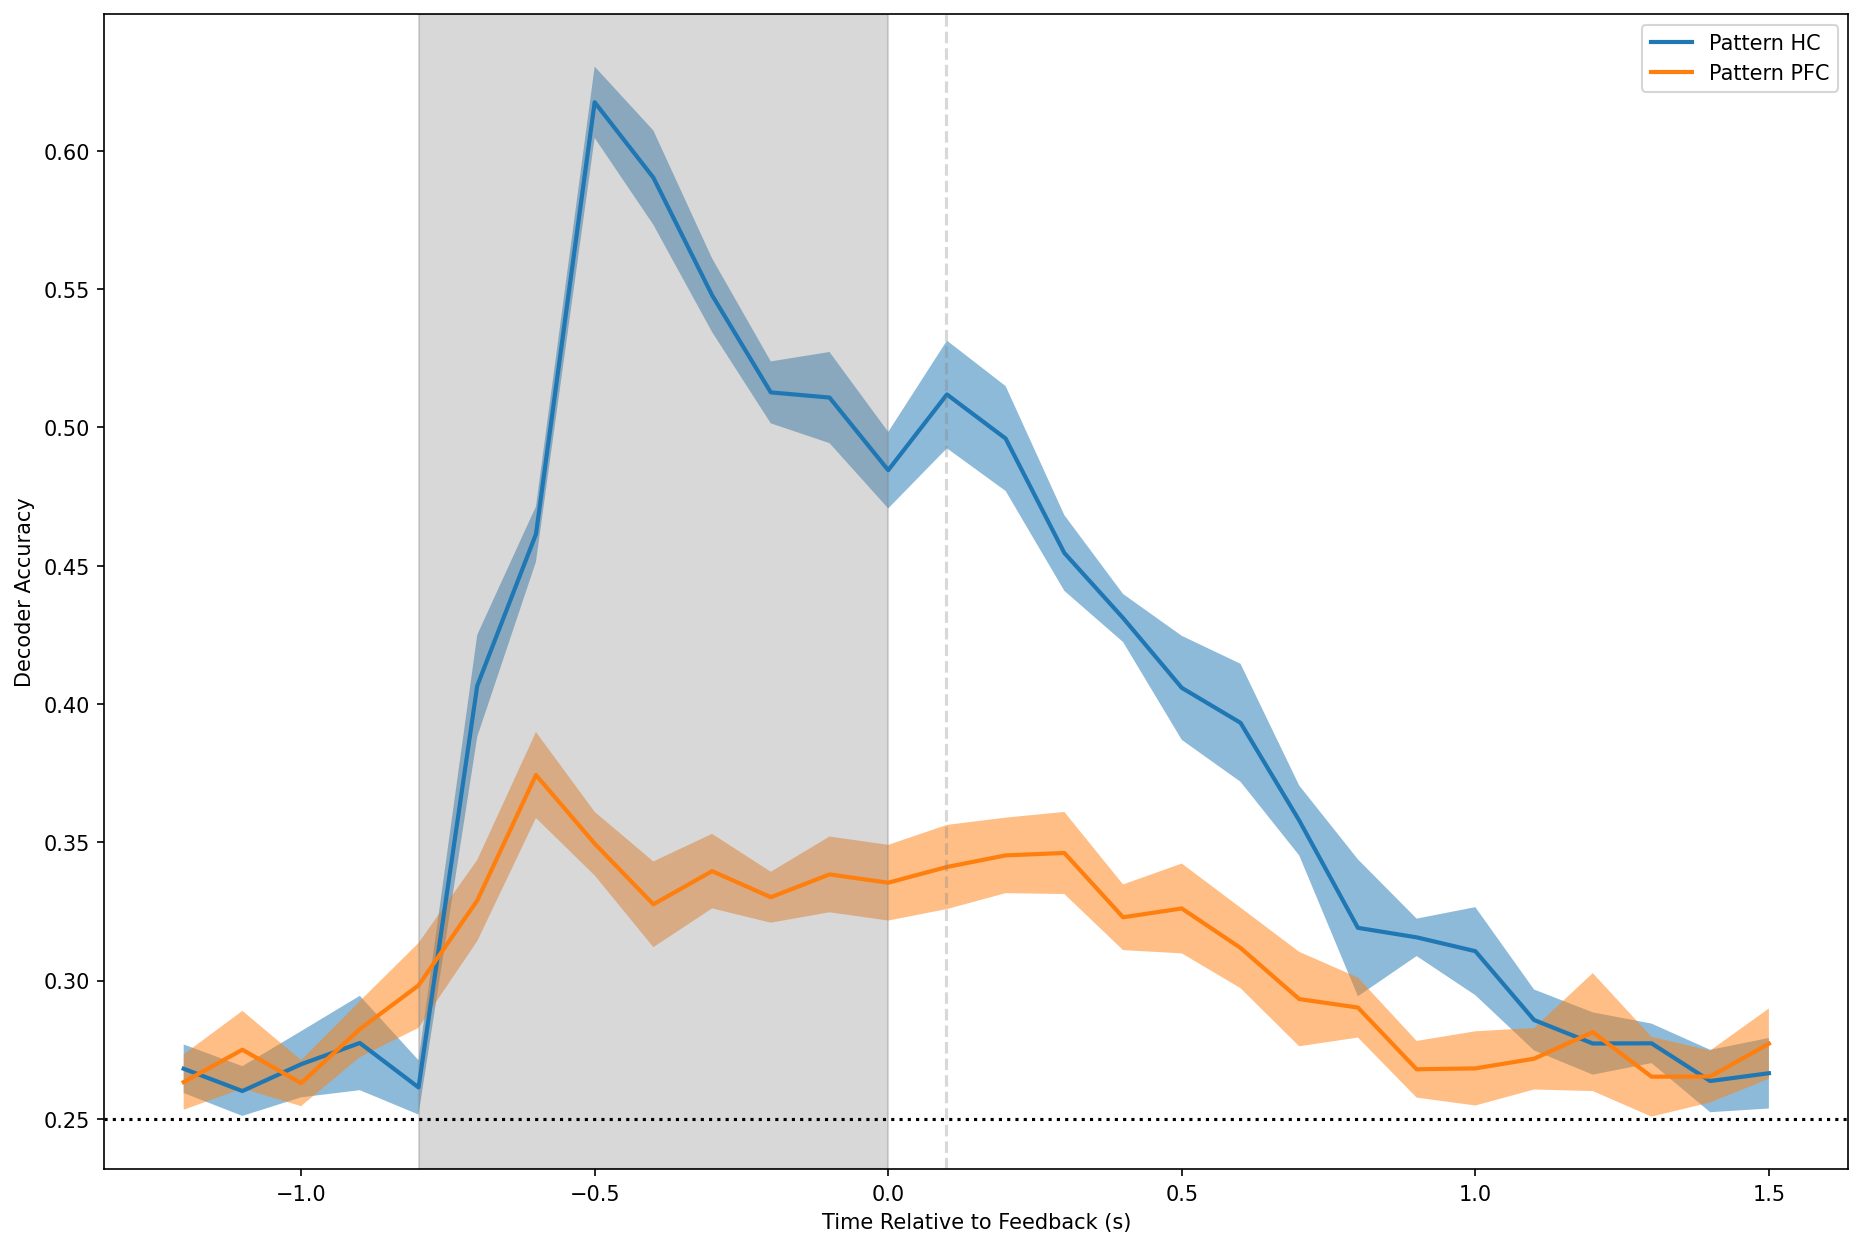

In [5]:
for feature_dim in FEATURE_DIMS:
    fig, ax = plt.subplots(dpi=150, figsize=(15, 10))

    hip_accs = np.load(os.path.join(OUTPUT_DIR, f"{feature_dim}_baseline_hip_all_no_proj_0.0_test_accs.npy"))
    pfc_accs = np.load(os.path.join(OUTPUT_DIR, f"{feature_dim}_baseline_pfc_all_no_proj_0.0_test_accs.npy"))

    # plots the mean and standard deviation of decoding accuracy across splits, by time. 
    visualization_utils.visualize_accuracy_across_time_bins(
        hip_accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} HC",
        right_align=True, 
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        pfc_accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} PFC",
        right_align=True, 
    )
    ax.legend()
    # add grey band for selection period
    ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
    # add dotted line for feedback start
    ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
    # add estimated chance
    ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
    ax.set_xlabel("Time Relative to Feedback (s)")
    ax.set_ylabel("Decoder Accuracy")

### Decoding of non-selected fixations

In [2]:
FEATURE_DIMS = ["Color", "Shape", "Pattern"]

# the output directory to store the data
OUTPUT_DIR = "/data/patrick_res/pseudo"

PRE_INTERVAL = 300   # time in ms before event
POST_INTERVAL = 500  # time in ms after event
INTERVAL_SIZE = 100  # size of interval in ms
NUM_BINS_SMOOTH = 1

Text(0, 0.5, 'Decoder Accuracy')

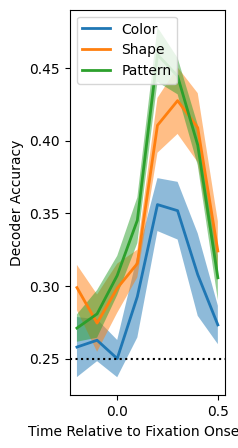

In [3]:
fig, ax = plt.subplots(figsize=(2, 5))

for feature_dim in FEATURE_DIMS:
    accs = np.load(os.path.join(OUTPUT_DIR, f"{feature_dim}_fixations_hip_test_accs.npy"))
    all_accs = np.load(os.path.join(OUTPUT_DIR, f"{feature_dim}_fixations_hip_test_accs.npy"))

    visualization_utils.visualize_accuracy_across_time_bins(
        accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim}",
        right_align=True, 
    )
ax.legend()
# # add grey band for selection period
# ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# # add dotted line for feedback start
# ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Fixation Onset (s)")
ax.set_ylabel("Decoder Accuracy")

### Cross decoding for selected features

(28, 28)
(28, 28)
(28, 28)


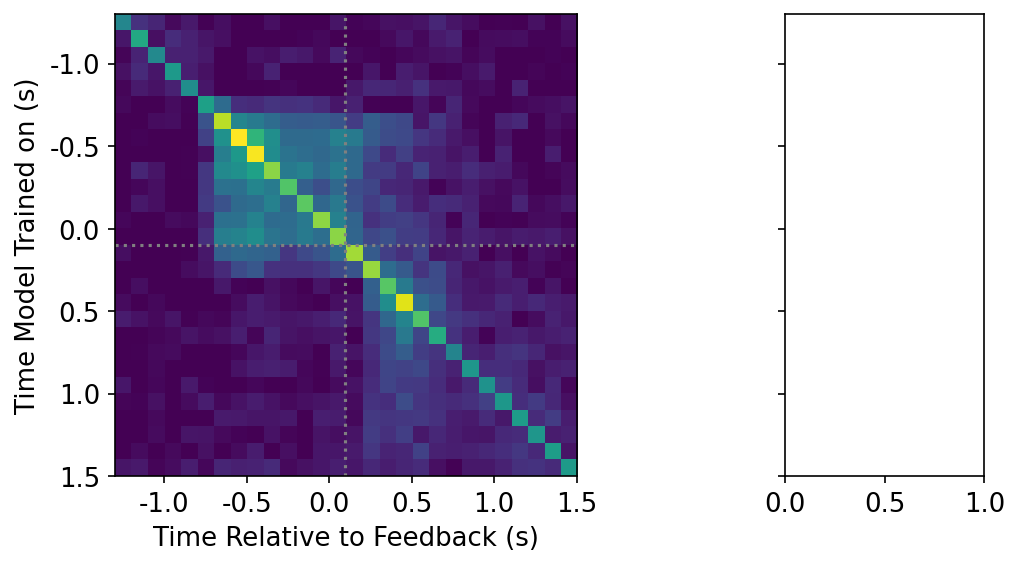

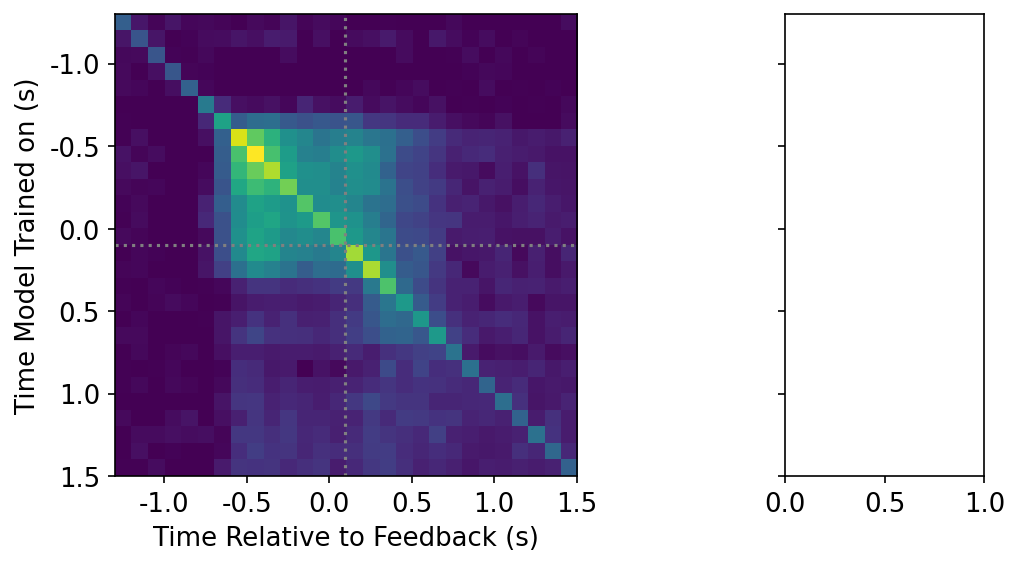

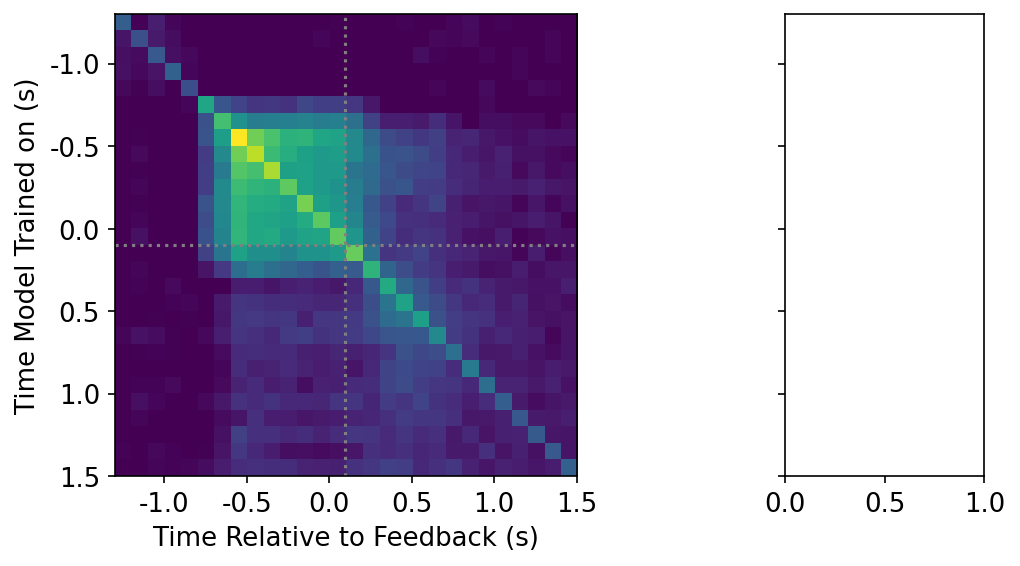

In [7]:
interval_size = 100
plt.rcParams.update({'font.size': 12.5})
for feature_dim in FEATURE_DIMS:
    cross_accs = np.load(os.path.join(OUTPUT_DIR, f"{feature_dim}_cross_acc_hip.npy"))
    # forgot to avg these, can fix later...
    cross_accs = np.mean(cross_accs, axis=2)
    print(cross_accs.shape)
    # cross_fix_accs = np.load(os.path.join(OUTPUT_DIR, f"{feature_dim}_selection_fixations_cross_accs.npy"))
    fig, axs = plt.subplots(1, 2, figsize=(8.5, 4), sharey=True, gridspec_kw={'width_ratios': [7, 2]}, dpi=150)
    ax = axs[0]
    colors = ax.matshow(cross_accs)
    colors.set_clim(vmin=0.25)
    ratio = 1000 / interval_size
    tick_labels = np.array([-1, -0.5, 0, 0.5, 1.0, 1.5])
    tick_pos = (tick_labels + 1.3) * ratio - 0.5
    ax.set_xticks(tick_pos)
    ax.set_xticklabels(tick_labels)
    ax.xaxis.tick_bottom()
    ax.set_yticks(tick_pos)
    ax.set_yticklabels(tick_labels)
    ax.axvline(13.48, color="gray", linestyle="dotted", linewidth=1.5)
    ax.axhline(13.48, color="gray", linestyle="dotted", linewidth=1.5)
    # ax.set_title(feature_dim)
    ax.set_xlabel("Time Relative to Feedback (s)")
    ax.set_ylabel("Time Model Trained on (s)")

    # ax = axs[1]
    # # colors = ax.matshow(cross_fix_accs)
    # colors.set_clim(vmin=0.25)
    # ratio = 1000 / interval_size
    # x_tick_labels = np.array([0, 0.5])
    # x_tick_pos = (x_tick_labels + 0.3) * ratio - 0.5
    # ax.set_xticks(x_tick_pos)
    # ax.set_xticklabels(x_tick_labels)
    # ax.xaxis.tick_bottom()
    # ax.set_yticks(tick_pos)
    # ax.set_yticklabels(tick_labels)
    # ax.set_xlabel("Time Relative to Fixation (s)")
    # fig.colorbar(colors, ax=axs)
    # fig.tight_layout()


